# TSP: Traveling Salesman Problem
## El problema del vendedor viajero (usando GUROBI)
- Sea $C$ el conjunto de ciudades que se deben visitar, con $C=\{0,...,n-1\}$.
- Sea $E$ el conjunto de arcos o links que unen a las ciudades, con $E=\{(i,j)\in C^2 : i\neq j\}$.
- Sea $x_{(i,j)}$ una variable binaria que es igual a 1 cuando se viaja de forma directa desde la ciudad $i$ a la ciudad $j$, con $(i,j)\in E$, y es igual cero en caso contrario.
- Sea $d_e$ la distancia del arco $e\in E$.

Luego, el problema a optimizar es el siguiente:
$$\begin{align}
\min \quad & \sum_{e\in E} d_e x_e \\
\text{s.t.} \quad & \sum_{e=(i,j)\in E} x_e = 1  &&\forall i \in C \\
 & \sum_{e=(i,j)\in E} x_e = 1 && \forall j \in C  \\
 & u_i + 1 \leq u_j + M(1-x_{ij})&& \forall (i,j)\in E : j\neq 0 \\
 & x_e \in \{0,1\} && \forall (i,j)\in E\\
 & u_i \geq 0 && \forall i \in C
\end{align}$$

In [1]:
import numpy as np
import gurobipy as gu
from gurobipy import Model, GRB, quicksum
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
n = 10
ciudades = [i for i in range(n)]

In [3]:
arcos = [(i, j) for i in ciudades for j in ciudades if i != j]

In [4]:
rnd = np.random
rnd.seed(1)
coord_x = rnd.rand(n) * 100
coord_y = rnd.rand(n) * 100
distancia = {(i, j): np.hypot(coord_x[i] - coord_x[j], coord_y[i] - coord_y[j])
            for i, j in arcos}

In [5]:
mdl = Model('TSP')

In [6]:
x = mdl.addVars(arcos, vtype=GRB.BINARY, name='x')
u = mdl.addVars(ciudades, vtype=GRB.CONTINUOUS, name='u')

$$\min \sum_{e\in E} d_e x_e$$

In [7]:
mdl.setObjective(quicksum(distancia[e] * x[e] for e in arcos), GRB.MINIMIZE)

$$\sum_{e=(i,j)\in E} x_e = 1 \quad \forall i \in C$$

In [8]:
for c in ciudades:
    mdl.addConstr(quicksum(x[(i,j)] for i,j in arcos if i==c)==1, name='out_%d'%c)

$$\sum_{e=(i,j)\in E} x_e = 1 \quad \forall j \in C $$

In [9]:
for c in ciudades:
    mdl.addConstr(quicksum(x[(i,j)] for i,j in arcos if j==c)==1, name='in_%d'%c)

$$u_i + 1 \leq u_j + M(1-x_{ij}) \quad \forall (i,j)\in E : j\neq 0$$

In [10]:
for i, j in arcos:
    if j!=0:
        mdl.addConstr((x[(i, j)] == 1) >> (u[i] + 1 == u[j]), name='order_(%d,_%d)'%(i, j))

In [11]:
tour = [0]
while len(tour) < n:
    k = tour[-1]
    new_dist = {(i, j): d for (i,j), d in distancia.items()
                if i==k and j not in tour}
    (i, j) = min(new_dist, key=new_dist.get)
    tour.append(j)
tour

[0, 7, 6, 5, 3, 1, 9, 8, 4, 2]

In [12]:
for g in range(n):
    i = tour[g - 1]
    j = tour[g]
    x[(i,j)].start = 1

In [13]:
mdl.Params.timeLimit = 60
mdl.Params.MIPGap = 0.2
mdl.optimize()

Changed value of parameter timeLimit to 60.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Changed value of parameter MIPGap to 0.2
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Optimize a model with 20 rows, 100 columns and 180 nonzeros
Model has 81 general constraints
Variable types: 10 continuous, 90 integer (90 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]

Loaded MIP start with objective 304.182 (0.02s)
MIP start did not produce a new incumbent solution

Presolve added 81 rows and 81 columns
Presolve time: 0.00s
Presolved: 101 rows, 181 columns, 423 nonzeros
Presolved model has 81 SOS constraint(s)
Variable types: 91 continuous, 90 integer (90 binary)

Root relaxation: objective 2.540685e+02, 15 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    

In [14]:
x, u

({(0, 1): <gurobi.Var x[0,1] (value 0.0)>,
  (0, 2): <gurobi.Var x[0,2] (value 0.0)>,
  (0, 3): <gurobi.Var x[0,3] (value 0.0)>,
  (0, 4): <gurobi.Var x[0,4] (value 0.0)>,
  (0, 5): <gurobi.Var x[0,5] (value 0.0)>,
  (0, 6): <gurobi.Var x[0,6] (value 0.0)>,
  (0, 7): <gurobi.Var x[0,7] (value 1.0)>,
  (0, 8): <gurobi.Var x[0,8] (value 0.0)>,
  (0, 9): <gurobi.Var x[0,9] (value 0.0)>,
  (1, 0): <gurobi.Var x[1,0] (value 0.0)>,
  (1, 2): <gurobi.Var x[1,2] (value 0.0)>,
  (1, 3): <gurobi.Var x[1,3] (value 0.0)>,
  (1, 4): <gurobi.Var x[1,4] (value 0.0)>,
  (1, 5): <gurobi.Var x[1,5] (value 0.0)>,
  (1, 6): <gurobi.Var x[1,6] (value 0.0)>,
  (1, 7): <gurobi.Var x[1,7] (value 0.0)>,
  (1, 8): <gurobi.Var x[1,8] (value 0.0)>,
  (1, 9): <gurobi.Var x[1,9] (value 1.0)>,
  (2, 0): <gurobi.Var x[2,0] (value 1.0)>,
  (2, 1): <gurobi.Var x[2,1] (value 0.0)>,
  (2, 3): <gurobi.Var x[2,3] (value 0.0)>,
  (2, 4): <gurobi.Var x[2,4] (value 0.0)>,
  (2, 5): <gurobi.Var x[2,5] (value 0.0)>,
  (2, 6): <

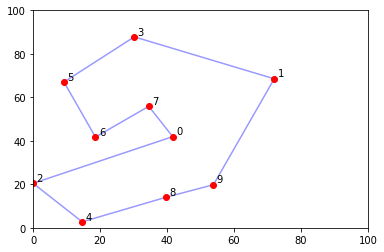

In [15]:
arcos_activos = [e for e in arcos if x[e].x > 0.9]
for i,j in arcos_activos:
    plt.plot([coord_x[i],coord_x[j]],[coord_y[i],coord_y[j]],
              color='b', alpha=0.4, zorder=0)
plt.scatter(x=coord_x, y=coord_y, color='r', zorder=1)
for i in ciudades:
    plt.annotate(i,(coord_x[i]+1,coord_y[i]+1))
plt.xlim((0,100))
plt.ylim((0,100))
plt.show()